In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from ydata_profiling import ProfileReport

warnings.filterwarnings('ignore')
plt.style.use("default")

In [22]:
df = pd.read_csv("Good_Reads_Book_Awards_Crawl_2023_12_27_11_14.csv")
df.sample(5)

,source_URL,Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,Book Description,First Published date,Kindle Version and Price,Kindle Price,About the Author
276,https://www.goodreads.com/book/show/62328661-r...,2142,History & Biography,Rough Sleepers,Tracy Kidder,4.36,"5,335",819,320,Hardcover,"In Rough Sleepers, Tracy Kidder shows how one ...",17-Jan-23,Kindle $13.99,13.99,Tracy Kidder is an American author and Vietnam...
19,https://www.goodreads.com/book/show/123414019-...,2176,Fiction,Family Meal,Bryan Washington,3.72,"2,841",493,320,Hardcover,"From the bestselling, award-winning author of ...",10-Oct-23,Kindle $14.99,14.99,Bryan Washington is an American writer. He pub...
135,https://www.goodreads.com/book/show/62873999-t...,2652,Science Fiction,Translation State,Ann Leckie,4.18,"6,512",967,422,Hardcover,The mystery of a missing translator sets three...,6-Jun-23,Kindle $14.99,14.99,NaN
132,https://www.goodreads.com/book/show/61884842-t...,3520,Science Fiction,The Deep Sky,Yume Kitasei,3.72,"3,885",855,399,Hardcover,Yume Kitasei's The Deep Sky is an enthralling ...,18-Jul-23,Kindle $14.99,14.99,Yume Kitasei (www.yumekitasei.com) is a Brookl...
206,https://www.goodreads.com/book/show/60784312-a...,19745,Debut Novel,Adelaide,Genevieve Wheeler,3.99,"23,881","4,071",304,Hardcover,"For twenty-six-year-old Adelaide Williams, an ...",18-Apr-23,Kindle Unlimited $0.00,0.00,Genevieve Wheeler (that’s me!) is an American ...


In [23]:
df.drop(['source_URL','Book Description','About the Author'],axis=1, inplace=True)

In [24]:
df.describe()

,Readers Choice Votes,Total Avg Rating,Number of Pages,Kindle Price
count,299.000000,299.000000,299.000000,299.000000
mean,19662.919732,4.063512,392.394649,11.327926
std,32406.337679,0.252188,123.698044,5.351909
min,935.000000,3.520000,192.000000,0.000000
25%,3591.000000,3.855000,320.000000,9.990000
50%,10099.000000,4.060000,368.000000,13.990000
75%,24714.000000,4.250000,432.000000,14.990000
max,397565.000000,4.750000,1242.000000,17.990000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Readers Choice Votes      299 non-null    int64  
 1   Readers Choice Category   299 non-null    object 
 2   Title                     299 non-null    object 
 3   Author                    299 non-null    object 
 4   Total Avg Rating          299 non-null    float64
 5   Number of Ratings         299 non-null    object 
 6   Number of Reviews         299 non-null    object 
 7   Number of Pages           299 non-null    int64  
 8   Edition                   299 non-null    object 
 9   First Published date      299 non-null    object 
 10  Kindle Version and Price  299 non-null    object 
 11  Kindle Price              299 non-null    float64
dtypes: float64(2), int64(2), object(8)
memory usage: 28.2+ KB


In [26]:
#Remove the unnecessary characters
numeric_columns = ['Number of Ratings','Number of Reviews']

for column in numeric_columns:
    df[column] = df[column].replace(',', '', regex=True).astype('int32')

In [27]:
df.describe()

,Readers Choice Votes,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Kindle Price
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,19662.919732,4.063512,38748.351171,5241.705686,392.394649,11.327926
std,32406.337679,0.252188,79586.655592,10800.069660,123.698044,5.351909
min,935.000000,3.520000,228.000000,71.000000,192.000000,0.000000
25%,3591.000000,3.855000,5516.500000,952.000000,320.000000,9.990000
50%,10099.000000,4.060000,14519.000000,2469.000000,368.000000,13.990000
75%,24714.000000,4.250000,37143.000000,5109.500000,432.000000,14.990000
max,397565.000000,4.750000,930928.000000,141668.000000,1242.000000,17.990000


In [28]:
#Convert the rest of the columns to correct data types
convert_dict = {'Readers Choice Votes': 'int32',
                'Readers Choice Category': 'category',
                'Title': 'string',
                'Author': 'string',
                'Total Avg Rating': 'float16',
                'Number of Pages': 'int16',
                'Edition': 'category',
                'First Published date': 'datetime64[ns]',
                'Kindle Price': 'float16'}
df = df.astype(convert_dict)
df.sample(10)

,Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,First Published date,Kindle Version and Price,Kindle Price
57,4099,Mystery & Thriller,Don't Let Her Stay,Nicola Sanders,4.000000,86126,6982,283,Kindle Edition,2023-02-09,Kindle Unlimited $0.00,0.000000
221,24429,Nonfiction,"The Art Thief: A True Story of Love, Crime, an...",Michael Finkel,4.031250,13228,1764,240,Hardcover,2023-06-22,Kindle $14.99,14.992188
214,4095,Debut Novel,River Sing Me Home,Eleanor Shearer,4.019531,18794,2469,322,Hardcover,2023-01-19,Kindle $12.99,12.992188
104,38157,Fantasy,Bookshops & Bonedust,Travis Baldree,4.300781,17800,4063,352,Paperback,2023-11-07,Kindle $12.99,12.992188
189,12821,Young Adult Fiction,Reign,Katharine McGee,3.960938,14945,1632,415,Paperback,2023-08-29,Kindle $10.99,10.992188
269,3444,History & Biography,The Earth Transformed: An Untold History,Peter Frankopan,3.939453,897,155,736,Hardcover,2023-03-02,Kindle $14.99,14.992188
226,15603,Nonfiction,Outlive: The Science and Art of Longevity,Peter Attia|Bill Gifford,4.421875,28257,2555,496,Hardcover,2023-03-28,Kindle $13.99,13.992188
45,34352,Mystery & Thriller,Bright Young Women,Jessica Knoll,4.050781,36608,4853,384,Hardcover,2023-09-19,Kindle $14.99,14.992188
33,6135,Historical Fiction,Let Us Descend,Jesmyn Ward,3.800781,8510,1454,320,Hardcover,2023-10-24,Kindle $14.99,14.992188
81,33665,Romantasy,Assistant to the Villain,Hannah Nicole Maehrer,3.939453,50630,10209,342,Paperback,2023-08-29,Kindle $12.99,12.992188


In [29]:
#Separate the currency from the text and put it in the new column
df['Kindle Version'] = df['Kindle Version and Price'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()
#Change the column into correct data type
df['Kindle Version'] = df['Kindle Version'].astype('category')
#Remove the previous column
df = df.drop('Kindle Version and Price', axis=1)
df.sample(10)
df.describe()

,Readers Choice Votes,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,First Published date,Kindle Price
count,299.000000,299.000000,299.000000,299.000000,299.000000,299,299.000000
mean,19662.919732,4.062500,38748.351171,5241.705686,392.394649,2023-05-19 09:57:11.438127104,11.328125
min,935.000000,3.519531,228.000000,71.000000,192.000000,2019-11-27 00:00:00,0.000000
25%,3591.000000,3.854492,5516.500000,952.000000,320.000000,2023-02-28 12:00:00,9.992188
50%,10099.000000,4.058594,14519.000000,2469.000000,368.000000,2023-05-16 00:00:00,13.992188
75%,24714.000000,4.250000,37143.000000,5109.500000,432.000000,2023-08-29 00:00:00,14.992188
max,397565.000000,4.750000,930928.000000,141668.000000,1242.000000,2023-11-13 00:00:00,17.984375
std,32406.337679,0.252197,79586.655592,10800.069660,123.698044,NaN,5.351562


In [30]:
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Readers Choice Votes     299 non-null    int32         
 1   Readers Choice Category  299 non-null    category      
 2   Title                    299 non-null    string        
 3   Author                   299 non-null    string        
 4   Total Avg Rating         299 non-null    float16       
 5   Number of Ratings        299 non-null    int32         
 6   Number of Reviews        299 non-null    int32         
 7   Number of Pages          299 non-null    int16         
 8   Edition                  299 non-null    category      
 9   First Published date     299 non-null    datetime64[ns]
 10  Kindle Price             299 non-null    float16       
 11  Kindle Version           299 non-null    category      
dtypes: category(3), datetime64[ns](1), f

,Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,First Published date,Kindle Price,Kindle Version
129,13494,Science Fiction,Children of Memory,Adrian Tchaikovsky,4.050781,14182,1525,503,Paperback,2023-01-31,9.992188,Kindle
247,11555,Memoir & Autobiography,Hijab Butch Blues,Lamya H.,4.488281,5785,1094,304,Hardcover,2023-02-07,13.992188,Kindle
2,57702,Fiction,The Wishing Game,Meg Shaffer,4.191406,62142,10594,304,Hardcover,2023-05-30,2.990234,Kindle
176,2581,Young Adult Fantasy & Science Fiction,Silver in the Bone,Alexandra Bracken,3.919922,6532,1713,480,Hardcover,2023-04-04,10.992188,Kindle
47,27135,Mystery & Thriller,Homecoming,Kate Morton,4.101562,53201,6523,547,Hardcover,2023-04-04,15.992188,Kindle
115,5118,Fantasy,Atalanta,Jennifer Saint,3.800781,11049,1861,291,Hardcover,2023-04-11,14.992188,Kindle
30,7379,Historical Fiction,Go as a River,Shelley Read,4.320312,36945,4854,320,Hardcover,2023-03-07,1.990234,Kindle
126,18660,Science Fiction,The Light Pirate,Lily Brooks-Dalton,4.058594,23184,3656,336,Hardcover,2022-12-06,13.992188,Kindle
41,73187,Mystery & Thriller,None of This Is True,Lisa Jewell,4.179688,215003,24754,384,Hardcover,2023-07-20,14.992188,Kindle
191,5728,Young Adult Fiction,Nine Liars,Maureen Johnson,3.830078,20319,3912,449,Hardcover,2022-12-27,10.992188,Kindle


Readers Choice Category
Fantasy                                  20
Fiction                                  20
Historical Fiction                       20
History & Biography                      20
Horror                                   20
Humor                                    20
Memoir & Autobiography                   20
Mystery & Thriller                       20
Nonfiction                               20
Romance                                  20
Romantasy                                20
Science Fiction                          20
Young Adult Fantasy & Science Fiction    20
Young Adult Fiction                      20
Debut Novel                              19
Name: count, dtype: int64


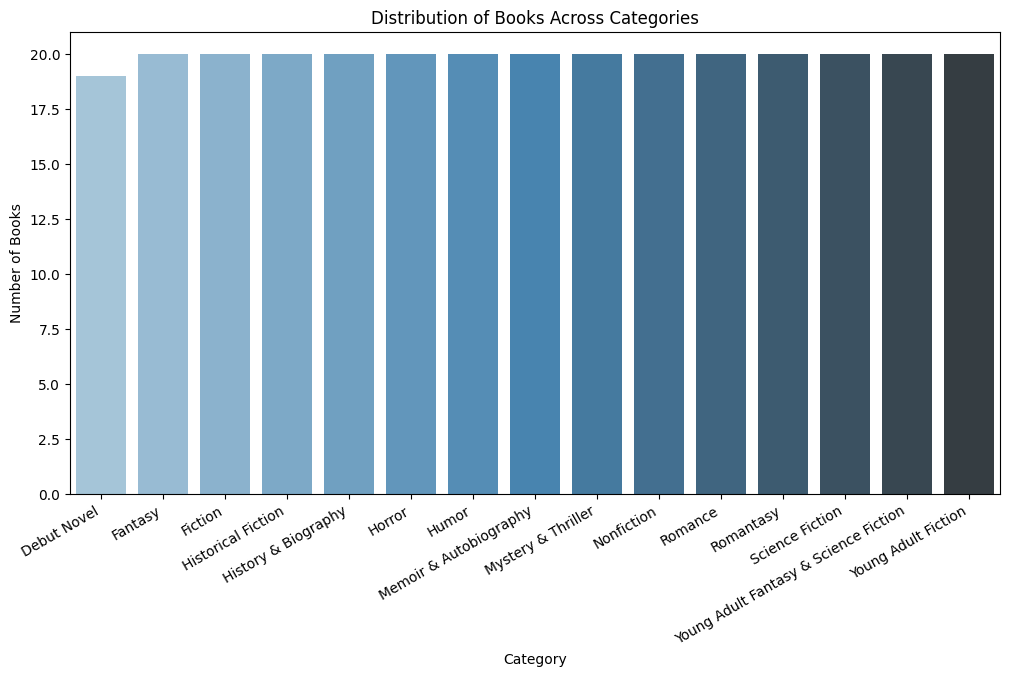

In [31]:
cat_counts = df['Readers Choice Category'].value_counts()
print(cat_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=cat_counts.index, y=cat_counts.values, palette = 'Blues_d')
plt.title('Distribution of Books Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.xticks(rotation=30, ha='right')
plt.show()

In [32]:
#Determine which column we want to aggregate
aggregations = {'Readers Choice Votes': 'sum', 
                'Total Avg Rating': 'mean',
               'Number of Ratings': 'sum',
               'Number of Reviews': 'sum',
                'Number of Pages': 'median',
                'Kindle Price': 'median',
               }

#Group by book category
category_vote = df.groupby('Readers Choice Category').agg(aggregations).sort_values('Readers Choice Votes', ascending=False)

# Calculate the percentage of total votes, total ratings, and total reviews for each category
total_votes = category_vote['Readers Choice Votes'].sum()
total_ratings = category_vote['Number of Ratings'].sum()
total_reviews = category_vote['Number of Reviews'].sum()
percent_of_total_votes = (category_vote['Readers Choice Votes'] / total_votes) * 100
percent_of_total_ratings = (category_vote['Number of Ratings'] / total_ratings) * 100
percent_of_total_reviews = (category_vote['Number of Reviews'] / total_reviews) * 100

# Create new DataFrame of Votes, Ratings, and Reviews
result_df = pd.DataFrame({
    'Votes (sum)': category_vote['Readers Choice Votes'], 
    '% Votes': percent_of_total_votes, 
    'Avg Ratings': category_vote['Total Avg Rating'].round(2),
    'Number of Ratings': category_vote['Number of Ratings'],
    '% of Total Ratings': percent_of_total_ratings.round(2),
    'Number of Reviews': category_vote['Number of Reviews'],
    '% of Total Reviews': percent_of_total_reviews.round(2),
    'Median Pages': category_vote['Number of Pages'],
    'Median Kindle Price': category_vote['Kindle Price'].round(2)
    })

#Find the most voted category
max_voted_cat = result_df['Votes (sum)'].idxmax()
max_votes = result_df['Votes (sum)'].max()
avg_rat = result_df.loc[max_voted_cat, 'Avg Ratings']

#Find the most rated category
max_rated_cat = result_df['Number of Ratings'].idxmax()
max_rates = result_df['Number of Ratings'].max()
pct_max_rates = result_df['% of Total Ratings'].max()

#Find the most reviewed category
max_reviewed_cat = result_df['Number of Reviews'].idxmax()
max_reviews = result_df['Number of Reviews'].max()
pct_max_reviews = result_df['% of Total Reviews'].max()

#Print the result 
print(f"The category '{max_voted_cat}' is The Most Voted Category of 2023, with {max_votes:,} votes")
print(f"The category '{max_rated_cat}' is The Most Rated Category of 2023, having an average rating of {format(avg_rat, '.2f')}, and number of ratings: {max_rates:,}, or {format(pct_max_rates, '.2f')}% of total ratings")
print(f"The category '{max_reviewed_cat}' is The Most Reviewed Category of 2023, with {max_reviews:,} number of reviews, or {format(pct_max_reviews, '.2f')}% of total reviews")

result_df



The category 'Romance' is The Most Voted Category of 2023, with 645,601 votes
The category 'Romance' is The Most Rated Category of 2023, having an average rating of 4.05, and number of ratings: 2,737,676, or 23.63% of total ratings
The category 'Romance' is The Most Reviewed Category of 2023, with 336,747 number of reviews, or 21.49% of total reviews


,Votes (sum),% Votes,Avg Ratings,Number of Ratings,% of Total Ratings,Number of Reviews,% of Total Reviews,Median Pages,Median Kindle Price
Readers Choice Category,,,,,,,,,
Romance,645601,10.981079,4.05,2737676,23.63,336747,21.49,398.0,6.99
Fiction,587718,9.996542,3.95,1288841,11.12,157445,10.05,328.0,14.99
Romantasy,572812,9.743005,4.07,1387830,11.98,203928,13.01,506.0,5.49
Mystery & Thriller,519745,8.840384,4.05,1673792,14.45,181312,11.57,365.5,14.99
Fantasy,456020,7.756480,4.10,523942,4.52,93625,5.97,407.5,14.73
Young Adult Fantasy & Science Fiction,400863,6.818311,4.04,543467,4.69,113098,7.22,440.0,10.99
Historical Fiction,390321,6.639001,4.14,692953,5.98,79846,5.09,368.0,12.99
Memoir & Autobiography,389374,6.622893,4.17,814014,7.03,99369,6.34,298.5,14.99
Young Adult Fiction,371283,6.315182,3.97,392355,3.39,73957,4.72,384.0,10.99


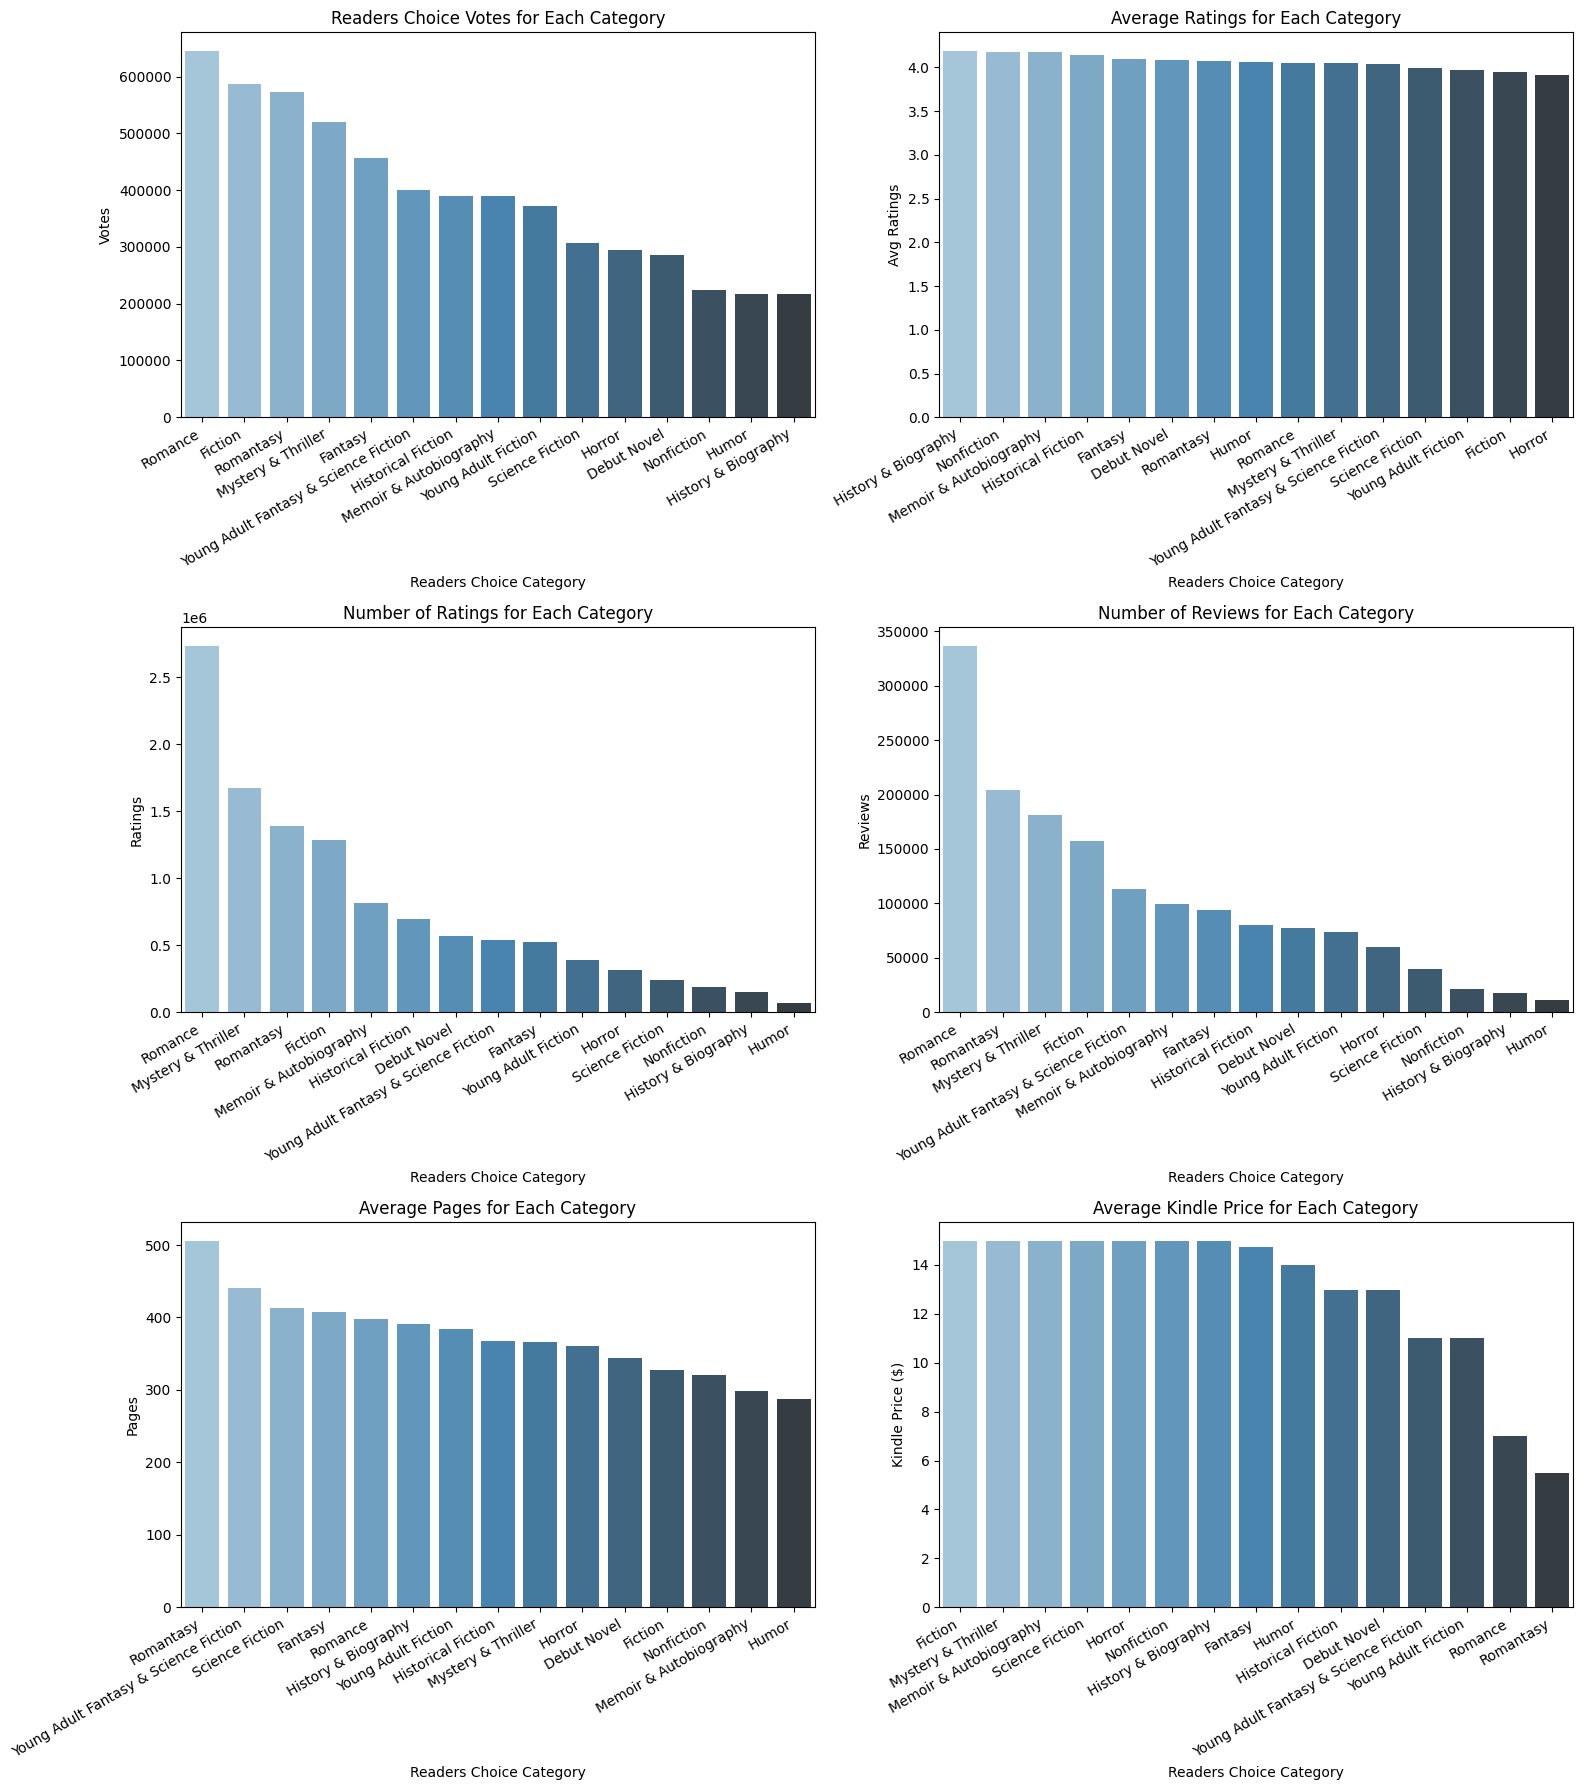

In [33]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18), sharey=False)

# First plot
sns.barplot(x=result_df.index, y=result_df['Votes (sum)'], palette='Blues_d', order=result_df.index, ax=axes[0, 0])
axes[0, 0].set_title('Readers Choice Votes for Each Category')
axes[0, 0].set_ylabel('Votes')
axes[0, 0].set_xticklabels(labels=result_df.index, rotation=30, ha='right')

# Second plot
result_df_sorted = result_df.sort_values(by='Avg Ratings', ascending=False)
sns.barplot(x=result_df_sorted.index, y=result_df_sorted['Avg Ratings'], palette='Blues_d', order=result_df_sorted.index, ax=axes[0, 1])
axes[0, 1].set_title('Average Ratings for Each Category')
axes[0, 1].set_ylabel('Avg Ratings')
axes[0, 1].set_xticklabels(labels=result_df_sorted.index, rotation=30, ha='right')

# Third plot
result_df_sorted = result_df.sort_values(by='Number of Ratings', ascending=False)
sns.barplot(x=result_df_sorted.index, y=result_df_sorted['Number of Ratings'], palette='Blues_d', order=result_df_sorted.index, ax=axes[1, 0])
axes[1, 0].set_title('Number of Ratings for Each Category')
axes[1, 0].set_ylabel('Ratings')
axes[1, 0].set_xticklabels(labels=result_df_sorted.index, rotation=30, ha='right')

# Fourth plot
result_df_sorted = result_df.sort_values(by='Number of Reviews', ascending=False)
sns.barplot(x=result_df_sorted.index, y=result_df_sorted['Number of Reviews'], palette='Blues_d', order=result_df_sorted.index, ax=axes[1, 1])
axes[1, 1].set_title('Number of Reviews for Each Category')
axes[1, 1].set_ylabel('Reviews')
axes[1, 1].set_xticklabels(labels=result_df_sorted.index, rotation=30, ha='right')

# Fifth plot
result_df_sorted = result_df.sort_values(by='Median Pages', ascending=False)
sns.barplot(x=result_df_sorted.index, y=result_df_sorted['Median Pages'], palette='Blues_d', order=result_df_sorted.index, ax=axes[2, 0])
axes[2, 0].set_title('Average Pages for Each Category')
axes[2, 0].set_ylabel('Pages')
axes[2, 0].set_xticklabels(labels=result_df_sorted.index, rotation=30, ha='right')

# Sixth plot
result_df_sorted = result_df.sort_values(by='Median Kindle Price', ascending=False)
sns.barplot(x=result_df_sorted.index, y=result_df_sorted['Median Kindle Price'], palette='Blues_d', order=result_df_sorted.index, ax=axes[2, 1])
axes[2, 1].set_title('Average Kindle Price for Each Category')
axes[2, 1].set_ylabel('Kindle Price ($)')
axes[2, 1].set_xticklabels(labels=result_df_sorted.index, rotation=30, ha='right')

plt.tight_layout()
plt.show()


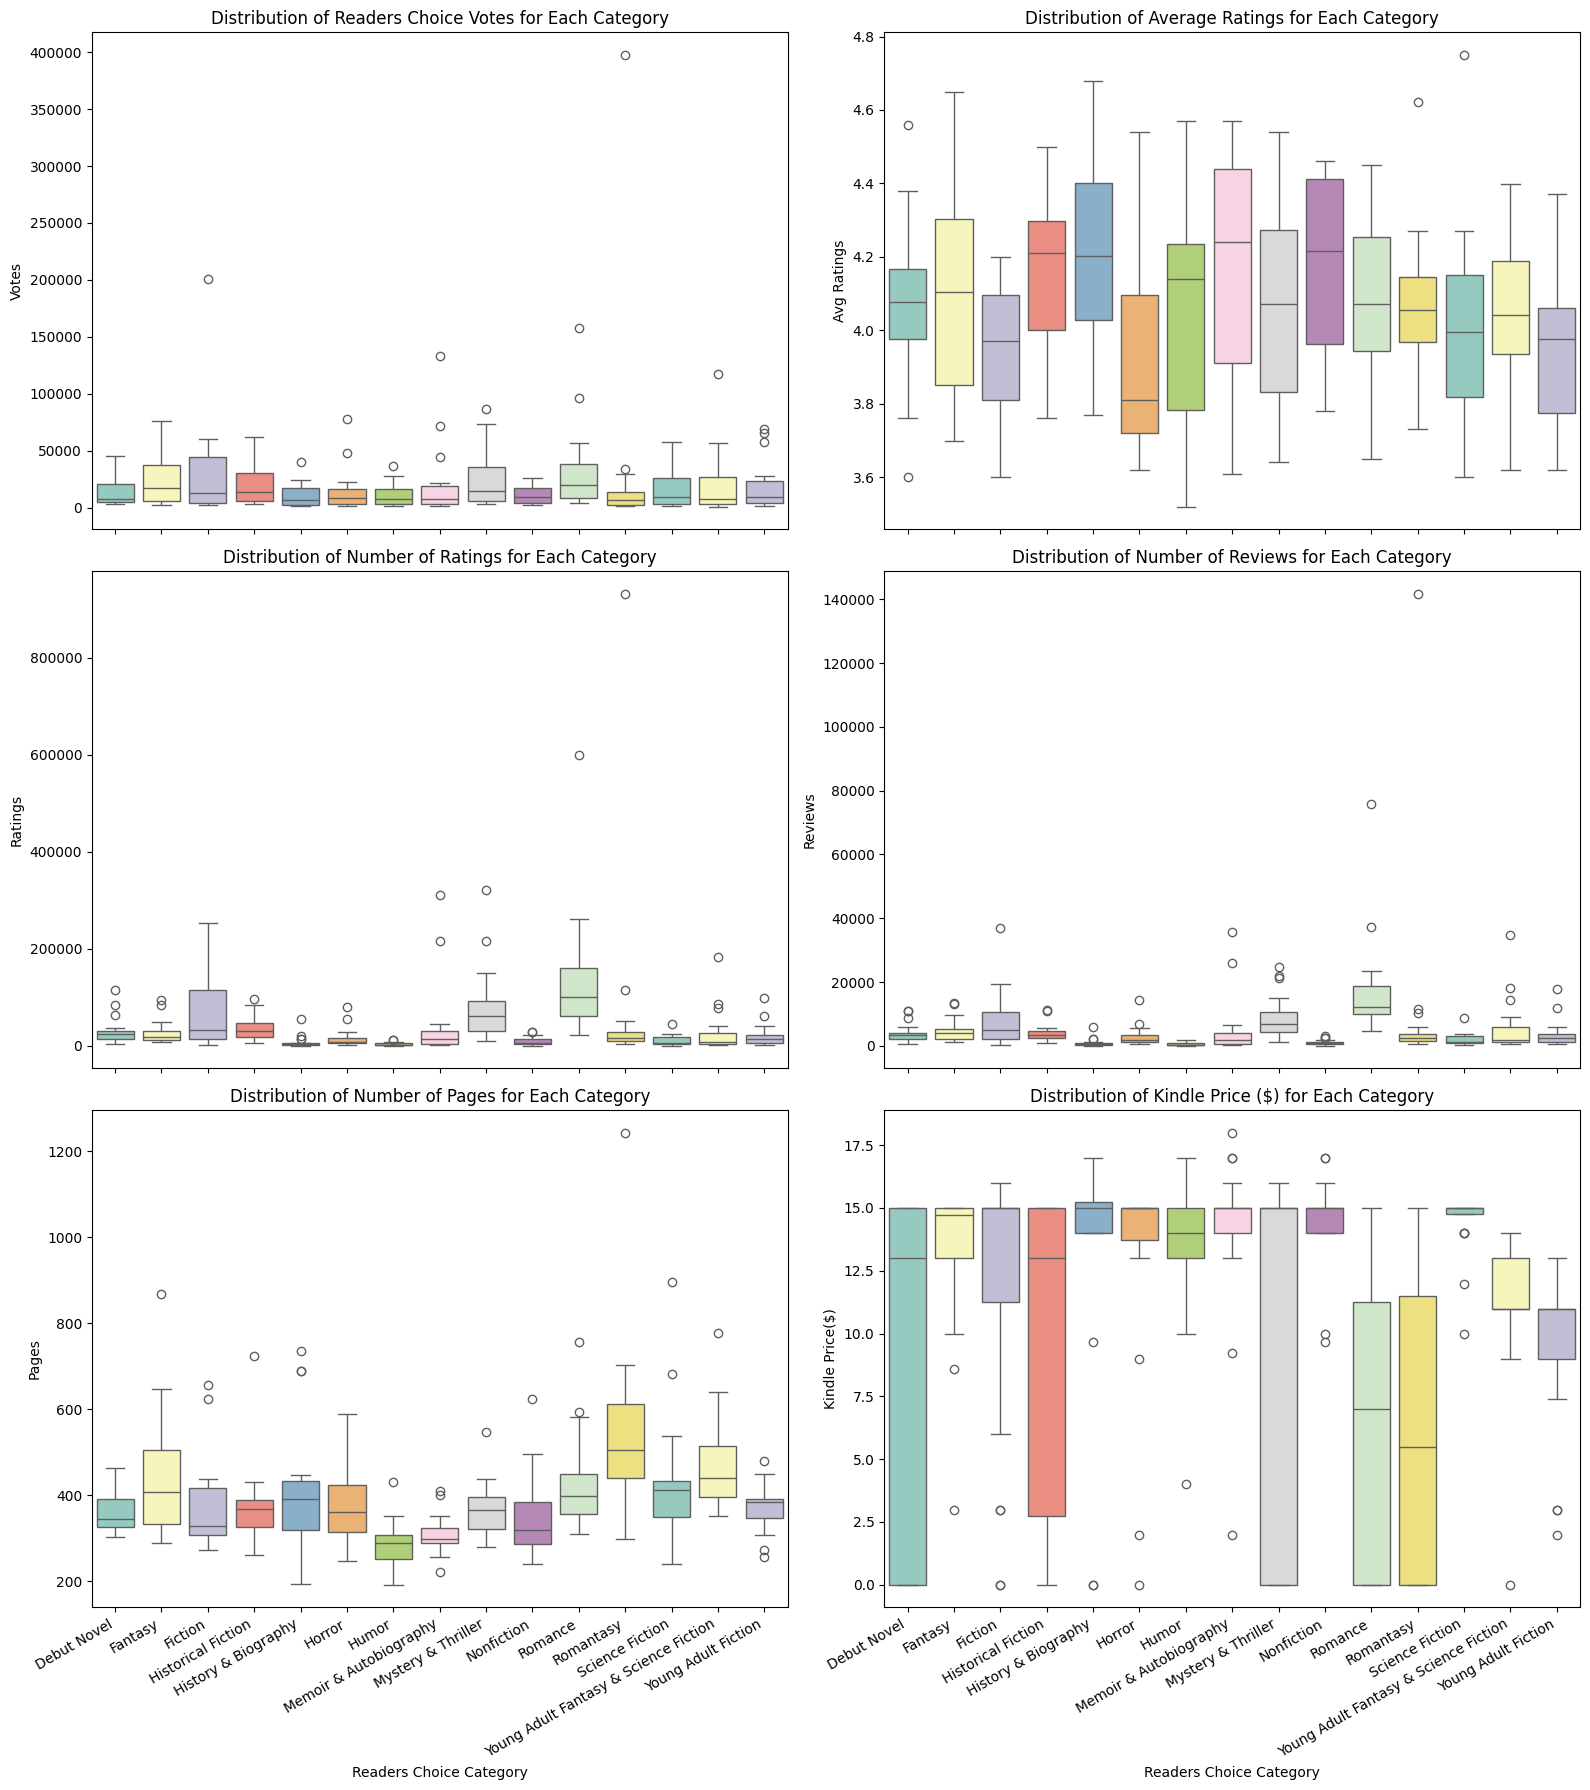

In [34]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18), sharey=False, sharex=True)

# First plot
sns.boxplot(data=df, x='Readers Choice Category', y='Readers Choice Votes', palette='Set3', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Readers Choice Votes for Each Category')
axes[0, 0].set_ylabel('Votes')

# Second plot
sns.boxplot(data=df, x='Readers Choice Category', y='Total Avg Rating', palette='Set3', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Average Ratings for Each Category')
axes[0, 1].set_ylabel('Avg Ratings')

# Third plot
sns.boxplot(data=df, x='Readers Choice Category', y='Number of Ratings', palette='Set3', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Number of Ratings for Each Category')
axes[1, 0].set_ylabel('Ratings')

# Fourth plot
sns.boxplot(data=df, x='Readers Choice Category', y='Number of Reviews', palette='Set3', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Number of Reviews for Each Category')
axes[1, 1].set_ylabel('Reviews')

# Fifth plot
sns.boxplot(data=df, x='Readers Choice Category', y='Number of Pages', palette='Set3', ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Number of Pages for Each Category')
axes[2, 0].set_ylabel('Pages')

# Sixth plot
sns.boxplot(data=df, x='Readers Choice Category', y='Kindle Price', palette='Set3', ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Kindle Price ($) for Each Category')
axes[2, 1].set_ylabel('Kindle Price($)')

for ax in axes[2, :]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    
fig.tight_layout()
plt.show()

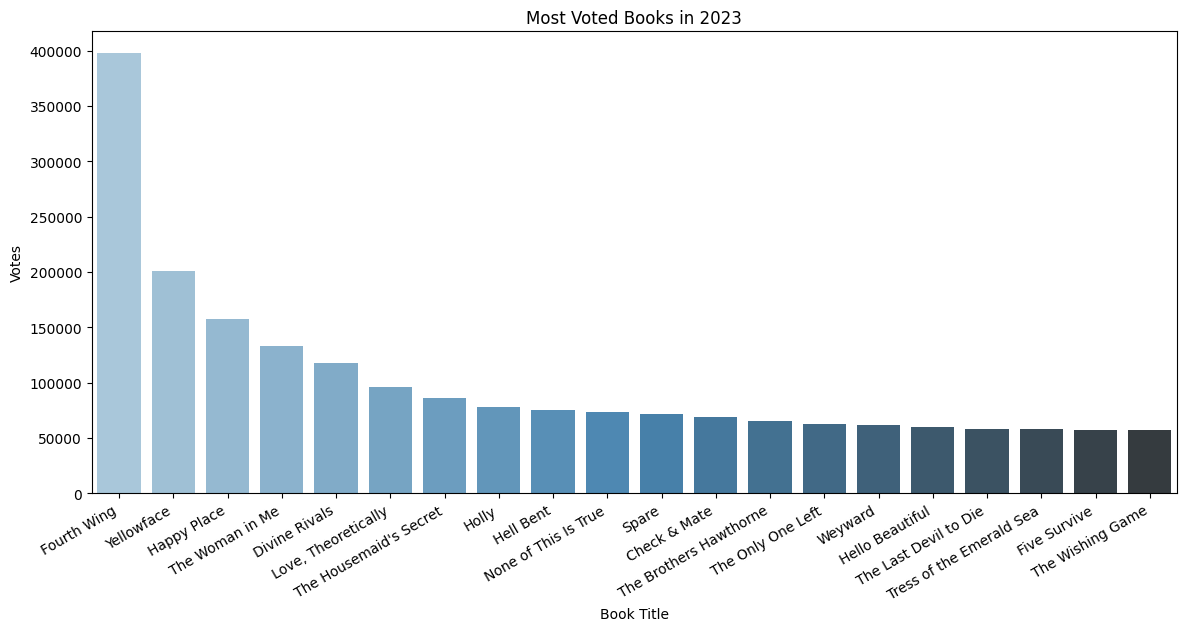

,Title,Readers Choice Category,Readers Choice Votes,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages
80,Fourth Wing,Romantasy,397565,4.621094,930928,141668,500
0,Yellowface,Fiction,200722,3.869141,252189,37032,336
60,Happy Place,Romance,157687,4.050781,599665,75814,400
239,The Woman in Me,Memoir & Autobiography,132867,4.050781,215178,26056,277
160,Divine Rivals,Young Adult Fantasy & Science Fiction,117671,4.261719,183916,34829,357
61,"Love, Theoretically",Romance,96439,4.160156,256083,37318,389
40,The Housemaid's Secret,Mystery & Thriller,86468,4.281250,321845,21398,318
140,Holly,Horror,77993,4.191406,54849,6818,449
100,Hell Bent,Fantasy,75800,4.160156,94667,13508,481
41,None of This Is True,Mystery & Thriller,73187,4.179688,215003,24754,384


In [35]:
most_voted_books = df[['Title', 'Readers Choice Category', 'Readers Choice Votes', 'Total Avg Rating', 'Number of Ratings', 'Number of Reviews', 'Number of Pages']].sort_values(by=['Readers Choice Votes', 'Number of Ratings', 'Number of Reviews'], ascending=False).head(20)

plt.figure(figsize=(14, 6))
sns.barplot(x=most_voted_books['Title'], y=most_voted_books['Readers Choice Votes'], data=most_voted_books, palette='Blues_d')
plt.title('Most Voted Books in 2023')
plt.xlabel('Book Title')
plt.ylabel('Votes')
plt.xticks(rotation=30, ha='right')
plt.show()

most_voted_books


In [36]:
max_votes_index = df.groupby('Readers Choice Category')['Readers Choice Votes'].idxmax()
titles_with_max_votes = df.loc[max_votes_index, ['Readers Choice Category', 'Title', 'Readers Choice Votes', 'Total Avg Rating', 'Number of Ratings', 'Number of Reviews', 'Number of Pages']].sort_values('Readers Choice Votes', ascending=False)
titles_with_max_votes

,Readers Choice Category,Title,Readers Choice Votes,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages
80,Romantasy,Fourth Wing,397565,4.621094,930928,141668,500
0,Fiction,Yellowface,200722,3.869141,252189,37032,336
60,Romance,Happy Place,157687,4.050781,599665,75814,400
239,Memoir & Autobiography,The Woman in Me,132867,4.050781,215178,26056,277
160,Young Adult Fantasy & Science Fiction,Divine Rivals,117671,4.261719,183916,34829,357
40,Mystery & Thriller,The Housemaid's Secret,86468,4.281250,321845,21398,318
140,Horror,Holly,77993,4.191406,54849,6818,449
100,Fantasy,Hell Bent,75800,4.160156,94667,13508,481
180,Young Adult Fiction,Check & Mate,68736,4.058594,60351,11800,352
20,Historical Fiction,Weyward,62211,4.121094,83461,11008,329


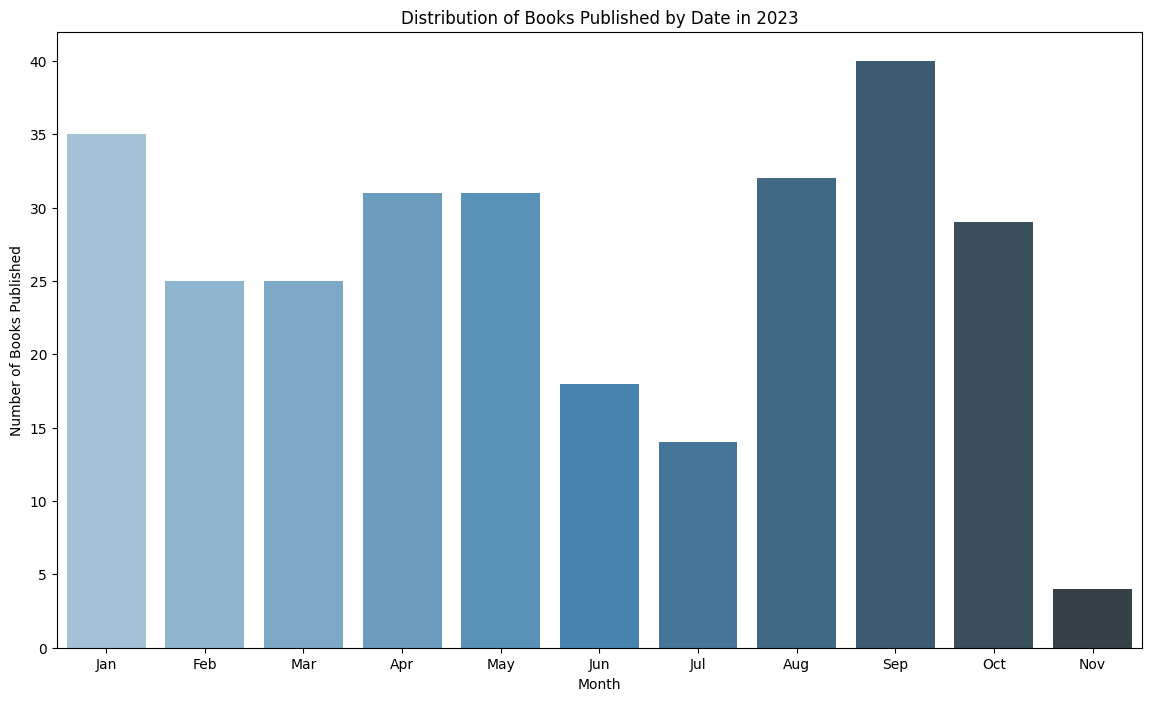

In [37]:
import calendar
df['First Published date'] = pd.to_datetime(df['First Published date'])

#Get only the books from year 2023.
books_2023 = df[df['First Published date'].dt.year == 2023]

#Count how many book released every month
books_per_month = books_2023.groupby(books_2023['First Published date'].dt.month)['Title'].count().reset_index()
books_per_month['Month'] = books_per_month['First Published date'].apply(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(14, 8))
sns.barplot(data=books_per_month, x='Month', y='Title', palette='Blues_d')
plt.title('Distribution of Books Published by Date in 2023')
plt.xlabel('Month')
plt.ylabel('Number of Books Published')
plt.show()


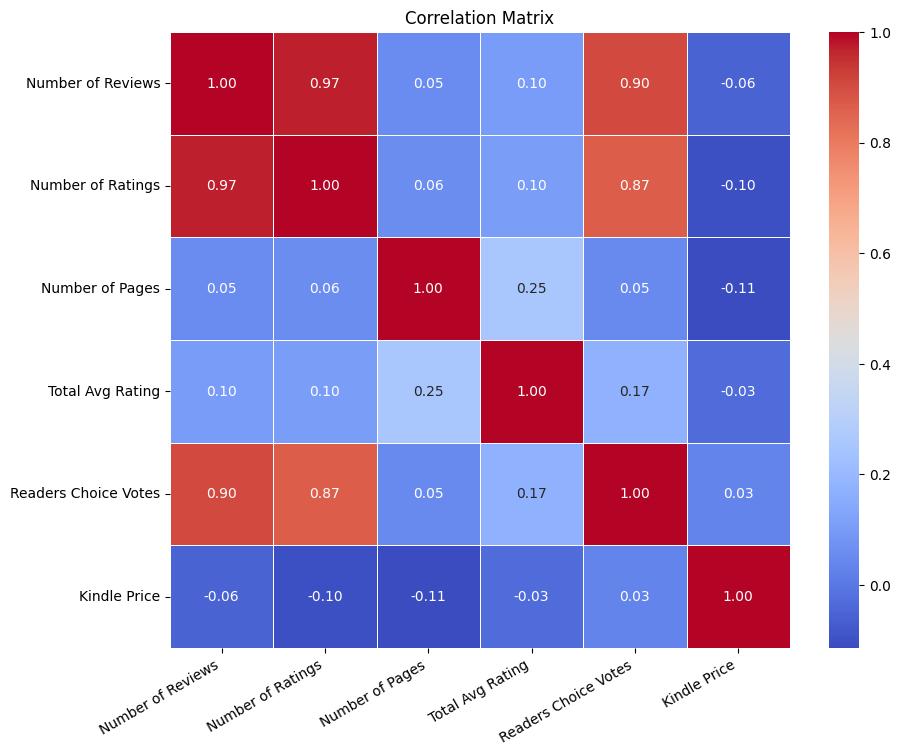

In [38]:
# Assign the columns
columns_of_interest = ['Number of Reviews', 'Number of Ratings', 'Number of Pages', 'Total Avg Rating', 'Readers Choice Votes', 'Kindle Price']

# Calculate the correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=30, ha='right')
plt.show()